In [3]:
#!pip install matplotlib numpy


# Diseño e Implementación de un transceptor LoRa


## 1. Introducción

### 1.1. Contexto y Relevancia de LoRa

El auge del Internet de las Cosas (IoT) impulsa la necesidad de tecnologías de comunicación inalámbrica que ofrezcan largo alcance, bajo consumo energético y robustez. LoRa (Long Range) es una tecnología de modulación de la capa física que responde a estos desafíos, utilizando una técnica de Espectro Expandido por Chirp (Chirp Spread Spectrum - CSS). Esta característica le permite operar eficientemente en escenarios donde los dispositivos IoT requieren comunicación a largas distancias con una vida útil de batería prolongada. Esta pieza del trabajo (el Jupyter Notebook) se enfoca en el análisis conceptual y la formulación matemática de los mecanismos de modulación y demodulación LoRa.

### 1.2. LoRa vs LoRaWAN


Es fundamental distinguir LoRa de LoRaWAN. **LoRa** es la tecnología de modulación propietaria de Semtech que define cómo se codifican los datos en ondas de radio para la transmisión (capa física). Por otro lado, **LoRaWAN** Es un protocolo de comunicación de capa superior (MAC y red) construido sobre LoRa, que define la arquitectura de red y la comunicación entre dispositivos y servidores.

**Este trabajo se centra exclusivamente en la modulación LoRa (capa física).**

### 1.3. Objetivos


El objetivo principal de este notebook es desarrollar una comprensión detallada de los procesos de modulación y demodulación LoRa. Específicamente, se busca:
1.  Describir los fundamentos del Chirp Spread Spectrum aplicado a LoRa.
2.  Formular matemáticamente la generación y demodulación de señales LoRa.


## 2. Fundamentos de Comunicaciones Digitales y Espectro Expandido

Antes de abordar los detalles específicos de la modulación LoRa, es esencial establecer una base sólida sobre los conceptos de comunicaciones digitales y, particularmente, las técnicas de espectro expandido, de las cuales LoRa es una variante.

### 2.1. Conceptos Básicos de Modulación Digital



La modulación es el proceso de variar una o más propiedades de una señal portadora periódica (generalmente una sinusoide) con una señal moduladora que típicamente contiene la información a ser transmitida. **En las comunicaciones digitales, la señal moduladora es una secuencia de símbolos digitales**.

#### 2.1.1. Señales Portadoras y Modulación


Una señal portadora sinusoidal puede expresarse como:

$s_c(t) = A_c \cos(2\pi f_c t + \phi_c)$

donde $A_c$ es la amplitud, $f_c$ es la frecuencia y $\phi_c$ es la fase de la portadora y cualquiera de estos parámetros podrá *embeber* una función correspondiente a la información que se vaya a transmitir.

La modulación es necesaria por varias razones:
*   **Facilita la radiación eficiente:** Las antenas requieren dimensiones físicas inversamente proporcionales a la frecuencia de la señal. Modular una señal de baja frecuencia (banda base) a una frecuencia portadora más alta permite el uso de antenas de tamaño práctico.
*   **Permite el multiplexado:** Diferentes señales pueden transmitirse simultáneamente sobre el mismo medio utilizando diferentes frecuencias portadoras (Multiplexación por División de Frecuencia - FDM) o diferentes códigos (Multiplexación por División de Código - CDM).
*   **Supera las limitaciones del canal:** Permite adaptar la señal a las características del canal de transmisión.

En la modulación digital, los parámetros de la portadora ($A_c, f_c, \phi_c$) se varían discretamente de acuerdo con los símbolos digitales de entrada. Esto da lugar a esquemas como ASK (Amplitude Shift Keying), FSK (Frequency Shift Keying) y PSK (Phase Shift Keying). LoRa por su parte utiliza una forma más sofisticada de modulación de frecuencia.

<center>

![https://www.5gtechnologyworld.com/digital-modulation-basics-part-1/](https://www.5gtechnologyworld.com/wp-content/uploads/2020/02/DigitalMod_pt1_fig1_Digital_modulation_waveforms_659x601.jpg.png)

*Figura 2.1. Técnicas de Modulación Digital (Fuente: [5gtechnologyworld](https://www.5gtechnologyworld.com/digital-modulation-basics-part-1/))*

</center>


#### 2.1.2. Ancho de Banda y Eficiencia Espectral

- **Ancho de Banda (Bandwidth - Bw):** Es el rango de frecuencias en el cual se concentra la mayor parte de la energía de una señal. También puede referirse al rango de frecuencias que un canal de comunicación puede transmitir con una atenuación aceptable. Es un recurso limitado y que implica consideraciones económicas muy grandes en cualquier tecnología de comunicación.
- **Eficiencia Espectral ($\eta$):** Se define como la tasa de bits de infromación transmitida ($R_b$) dividida por el ancho de banda del canal ($Bw$) utilizado, expresada típicamente en bits por segundo por Hercio ($\frac{bps}{Hz}$)

    $\eta = R_b / Bw$

Existe un compromiso fundamental entre la eficiencia espectral, la potencia de la señal y la probabilidad de error. Tecnologías como LoRa, que operan con espectro expandido, sacrifican deliberadamente la eficiencia espectral para lograr mayor robustez y alcance.

### 2.2. Densidad Espectral de Potencia (PSD)


#### 2.2.1. Definición e Importancia


La Densidad Espectral de Potencia (PSD), denotada como $S_x(f)$ o $P_x(f)$, de una señal $x(t)$ describe cómo se distribuye la potencia de esa señal en el dominio de la frecuencia.

Para una señal determinista de energía finita, se relaciona con la Transformada de Fourier $X(f)$ de la señal mediante el Teorema de Parseval o Rayleigh.

Para señales de potencia (como procesos aleatorios), la PSD se define a través de la Transformada de Fourier de la función de autocorrelación.

> La PSD indica la cantidad de potencia por unidad de ancho de banda en una frecuencia particular. Su unidad es típicamente Vatios por Hercio (W/Hz) o dBm/Hz.

<center>

![https://www.qsl.net/n9zia/ssfig1.gif](https://www.qsl.net/n9zia/ssfig1.gif)

*Figura 2.2. Forma de Onda de Espectro Expandido y Espectro "Contraido" (Fuente: [qsl](https://www.qsl.net/n9zia/ss.qexss.html))* 

</center>

La PSD es crucial para:
*   Caracterizar señales y ruido en sistemas de comunicación.
*   Analizar la interferencia entre diferentes sistemas.
*   Diseñar filtros.
*   Cumplir con regulaciones espectrales que limitan la potencia emitida en ciertas bandas.

#### 2.2.2. PSD y la Detección de Señales

La capacidad de un receptor para detectar una señal depende de la relación señal a ruido (SNR) a la salida del demodulador. Una señal con una PSD baja puede estar "oculta" bajo el nivel de ruido del canal, haciendo su detección difícil para receptores convencionales. Las técnicas de espectro expandido, al distribuir la potencia de la señal sobre un ancho de banda mucho mayor, resultan en una PSD muy baja, lo que tiene implicaciones tanto para la detección como para la coexistencia con otras señales.

### 2.3. Técnicas de Espectro Expandido (Spread Spectrum - SS)


Las técnicas de Espectro Expandido entonces son métodos de modulación en los cuales la energía de la señal se dispersa deliberadamente sobre un ancho de banda mucho mayor que el mínimo necesario para transmitir la información. Esta expansión se logra utilizando una señal de codificación independiente de los datos.

#### 2.3.1. Principio Fundamental y Ventajas

El principio fundamental del SS es aumentar el ancho de banda de la señal transmitida $Bw_{SS}$ para que sea mucho mayor que el ancho de banda de la información $Bw_{info}$. La relación $Bw_{SS} / Bw_{info}$ se conoce como **ganancia de procesamiento (Processing Gain - PG)**. Un receptor SS correlaciona la señal recibida con una réplica sincronizada de la señal de codificación, lo que permite "des-expandir" la señal deseada y, al mismo tiempo, expandir (y por tanto atenuar en densidad) las señales interferentes de banda estrecha.

**Ventajas principales del Espectro Expandido:**

- **Resistencia a Interferencias y Ruido:** La ganancia de procesamiento permite que el sistema rechace interferencias de banda estrecha y ruido. Una interferencia que ocupe una pequeña porción del espectro expandido se distribuye sobre un ancho de banda más amplio después del proceso de des-expansión en el receptor, reduciendo su impacto.

- **Baja Densidad Espectral de Potencia (LPD) y Baja Probabilidad de Interceptación (LPI):** Al distribuir la potencia de la señal sobre un gran ancho de banda, la PSD de la señal SS es muy baja, a menudo por debajo del umbral de ruido. Esto hace que la señal sea difícil de detectar por receptores no intencionados (Low Probavility of intercept, LPI) y reduce la interferencia causada a otros sistemas de banda estrecha (Low Probability of Detection, LPD).
- **Mitigación del Desvanecimiento por Multitrayecto**: En canales multitrayecto (es decir que la señal transmitida llega al receptor a través de múltiples caminos con diferentes retardos y atenuaciones), si el ancho de banda es mayor que el ancho de banda mínimo (*o de coherencia*), entonces el receptor podrá resolver estos componentes redunciendo el *impacto del desvanecimiento selectivo en frecuencia*.

> **NOTA:** El desvanecimiento por multitrayecto puede ser modelado como un filtro con respuesta al impulso $h(t)=a_0\delta (t- \tau _0)+ a_1\delta (t-\tau _1)...$ y de hecho será una parte crucial de la suite de pruebas que se realizará sobre la implementación discutida en este notebook.

#### 2.3.2. Espectro Expandido por Secuencia Directa (DSSS)
En DSSS, la señal de datos de banda estrecha se multiplica directamente por una señal de código de ensanchamiento de alta vleocidad (una secuencia pseudoaleatoria o PN). Esta señal de código consiste en pulsos llamados *"chips"*.

> De ahí que se emplee el término en LoRa, por más de que en esta técnica (LoRa) estos chips ya no sean psuedoaleatorios.

> **Nota:** Como se puede apreciar, la tasa de la secuencia de código (tasa de chip, $R_c$) es mucho mayor que la tasa de bits de la información ($R_b$). Cada bit de datos se representa por múltiples chips. La relación entonces $R_c / R_b$ se conoce como ganancia de procesamiento.
> De ahí se puede apreciar como un chip es *"un elemento básico de la secuencia de ensanchamiento, análogo a un bit en la secuencia de datos, pero ocurriendo a una tasa mucho mayor"*.

<center>

![https://www.researchgate.net/profile/Prajoy-Podder/publication/283181824/figure/fig7/AS:525056167157762@1502194553497/Modulation-process-of-SS-DSSS-FHSS.png](https://www.researchgate.net/profile/Prajoy-Podder/publication/283181824/figure/fig7/AS:525056167157762@1502194553497/Modulation-process-of-SS-DSSS-FHSS.png)

*Figura 2.3. Modulación DSSS (Fuente: [researchgate](https://www.researchgate.net/profile/Prajoy-Podder/publication/283181824/figure/fig7/AS:525056167157762@1502194553497/Modulation-process-of-SS-DSSS-FHSS.png))*


</center>

#### 2.3.3. Espectro Expandido por Salto de Frecuencia (FHSS)


En FHSS, la frecuencia de la portadora de la señal se cambia (salta) pseudoaleatoriamente a través de un amplio conjunto de canales de frecuencia. El transmisor y el receptor deben estar sincronizados y seguir el mismo patrón de salto.

Este patrón de salto está determinado por una secuencia pseudoaleatoria. La señal permanece en cada frecuencia durante un corto intervalo de tiempo (tiempo de permanencia o "dwell time"). FHSS es robusto contra interferencias de banda estrecha, ya que la señal solo se verá afectada si la interferencia coincide con la frecuencia de salto actual.

<center>

![https://miro.medium.com/v2/resize:fit:720/format:webp/1*AtudvJTo_R5EuPjeG6n2lg.png](https://miro.medium.com/v2/resize:fit:720/format:webp/1*AtudvJTo_R5EuPjeG6n2lg.png)

*Figura 2.4. Modulación FHSS (Fuente: [medium](https://miro.medium.com/v2/resize:fit:720/format:webp/1*AtudvJTo_R5EuPjeG6n2lg.png))*


</center>

#### 2.3.4. Modulación Chirp Spread Spectrum (CSS)


La Modulación Chirp Spread Spectrum (CSS) es una técnica de espectro expandido que utiliza señales "chirp" (también conocidas como pulsos de frecuencia modulada linealmente) para codificar la información. LoRa es el ejemplo más prominente de CSS en el ámbito de las LPWAN (Low Power Wireless Area Network).

**Definición de una señal Chirp (Barrido Lineal de Frecuencia)**

Un chirp es una señal cuya frecuencia instantánea varía linealmente con el tiempo. Un "**up-chirp**" es aquel cuya frecuencia aumenta con el tiempo, mientras que un "**down-chirp**" es aquel cuya frecuencia disminuye.

> **NOTA:** El concepto de *chirp* es análogo a su homónimo usado en Ingeniería de Sonido referido a un sonido que se hace más agudo o más grave a lo largo del tiempo.

Matemáticamente, la frecuencia instantánea $f(t)$ de un chirp lineal puede describirse como:

$f(t) = f_0 + k \cdot t$

donde $f_0$ es la frecuencia inicial y $k$ es la tasa de barrido de frecuencia (constante). 

Entonces, se tiene que la señal de chirp en sí misma es una sinusoide cuya fase es la integral de esta frecuencia instantánea. Su versión compleja (que servirá más adelante, se puede catalogar como):

$s(t) = K e^{j \cdot2 \pi \cdot \int_{0}^{t}f(\tau)d\tau}$


<center>

![https://miro.medium.com/v2/resize:fit:1400/format:webp/1*8u9sAtz7G11dRUTm_51XDA.png](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*8u9sAtz7G11dRUTm_51XDA.png)

*Figura 2.5. Modulación CSS (Fuente: [medium](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*8u9sAtz7G11dRUTm_51XDA.png))*


</center>

**Ventajas de CSS**
- **Robustez Inherente**: Las señales chirp tienen una excelente tolerancia al desvanecimiento por multitrayecto y al efecto Doppler, ya que la información está codificada en la tasa de cambio de frecuencia, no en una frecuencia o fase absoluta.
- **Sincronización Sencilla:** Las propiedades de autocorrelación de las señales chirp facilitan la sincronización en el receptor.
- **Ganancia de Procesamiento:** Al ser Spread Spectrum, esta técnica al igual que las otras se beneficia de una ganancia de procesamiento por lo que se mimetiza más con el ruido y logra mejor desempeño con respecto al SNR.

## 3. Modulación LoRa: Principios y Formulación Matemática

La modulación LoRa es una implementación específica de la técnica Chirp Spread Spectrum (CSS). Su diseño se enfoca en lograr comunicaciones robustas a largas distancias, con una alta inmunidad a la interferencia y al desvanecimiento por multitrayecto, manteniendo al mismo tiempo un bajo consumo energético. Esta sección desglosa los principios de funcionamiento y la formulación matemática para la generación de señales LoRa.

### 3.1. El Chirp como Base de la Modulación LoRa

En LoRa, cada símbolo de información se representa mediante un chirp que barre un rango de frecuencias específico, desde una frecuencia inicial hasta una frecuencia final, dentro del ancho de banda asignado ($Bw$). LoRa utiliza chirps "cíclicos": cuando la frecuencia instantánea alcanza el límite del ancho de banda (superior o inferior), "envuelve" (wraps around) y continúa desde el límite opuesto.

Por ejemplo, un "up-chirp" básico comenzaría en la frecuencia más baja del canal, barrería linealmente hasta la frecuencia más alta, y si el tiempo del símbolo aún no ha terminado, saltaría de nuevo a la frecuencia más baja para continuar el barrido. La información (el símbolo a transmitir) se codifica modificando la frecuencia inicial de este chirp base.

#### 3.1.1. Upchirps y Downchirps


LoRa define dos tipos fundamentales de chirps:

*   **Up-chirp:** La frecuencia instantánea aumenta linealmente con el tiempo. Se utiliza para la transmisión de datos en la mayoría de los casos.
    *   $f(t) = f_{start} + k \cdot t \pmod{Bw}$
    *   donde $k > 0$.
*   **Down-chirp:** La frecuencia instantánea disminuye linealmente con el tiempo. Se utiliza principalmente para la sincronización (en el preámbulo de los paquetes/tramas LoRa) y, conceptualmente, es la señal con la que se correlaciona en el receptor para la demodulación.
    *   $f(t) = f_{start} - k \cdot t \pmod{Bw}$ 
    *   donde $k > 0$.

Para la transmisión de un símbolo de datos, LoRa utiliza up-chirps. Un símbolo con valor $C$ se representa mediante un up-chirp cuya frecuencia inicial se desplaza cíclicamente en función de $C$.

### 3.2. Parámetros Fundamentales de la Modulación LoRa

El comportamiento de la modulación LoRa está determinado por tres parámetros configurables principales:

#### 3.2.1. Factor de Propagación (Spreading Factor - SF)

El Factor de Propagación, denotado como `SF`, es un entero que típicamente varía entre 7 y 12. Define el número de bits que se codifican en cada símbolo LoRa.
*   **Número de bits por símbolo:** $SF$ bits.
*   **Número de símbolos posibles:** $M = 2^{SF}$. Cada símbolo puede tomar un valor entre $0$ y $2^{SF}-1$.

Un `SF` más alto implica:
*   **Menor tasa de bits (Bit Rate):** Se transmiten $SF$ bits en un tiempo de símbolo más largo.
    *   $R_s = Bw / 2^{SF}$ (Tasa de Símbolos o Chirps por segundo)
    *   $R_b = SF \cdot (Bw / 2^{SF})$ (Tasa de Bits)
*   **Mayor tiempo en el aire por símbolo:** Aumenta la energía por símbolo, mejorando la relación señal a ruido (SNR) efectiva en el receptor.
*   **Mayor alcance y robustez:** La señal es más resistente al ruido y a las interferencias, y puede ser decodificada a niveles de SNR más bajos (incluso en escenarios con decibelios negativos).
*   **Menor capacidad de red:** Más tiempo en el aire significa que menos dispositivos pueden compartir el canal.

Un `SF` más bajo implica lo contrario: mayor tasa de bits, menor tiempo en el aire, menor alcance y robustez, pero mayor capacidad de red. La elección del `SF` es un compromiso entre estos factores.

#### 3.2.2. Ancho de Banda (Bandwidth - Bw)

El Ancho de Banda ($Bw$) define el rango de frecuencias sobre el cual el chirp realizará su barrido. Los valores típicos son 125 kHz, 250 kHz y 500 kHz, aunque otros valores son posibles dependiendo de las regulaciones regionales y el hardware.

El ancho de banda está directamente relacionado con la "tasa de chip" fundamental de LoRa. Un chip en LoRa puede entenderse como la unidad de tiempo más pequeña asociada a un incremento discreto de frecuencia. La duración de un chip es $T_c = 1/Bw$.
*   Un mayor $Bw$ implica una tasa de chip más alta y, por lo tanto, una tasa de símbolo y de bits más alta para un `SF` dado.
*   Incrementar el $Bw$ duplica la tasa de datos, pero también aumenta la potencia de ruido recibida, lo que puede afectar la sensibilidad


#### 3.2.3. Muestras por Chip (Samples per Chip - SPC)

El parámetro de Muestras por Chip (`SPC`) define cuántas muestras digitales se toman para representar cada "chip" temporal de la señal LoRa durante su generación o procesamiento digital. 
*   Un "chip" en LoRa tiene una duración $T_c = 1/Bw$.
*   El número total de chips en un símbolo es $2^{SF}$.

Si bien conceptualmente hay $2^{SF}$ "posiciones" de frecuencia distintas que el chirp puede ocupar, el parámetro `SPC` (a menudo llamado factor de sobremuestreo en otros contextos) afecta la granularidad de la representación digital de la señal:
*   Un `SPC = 1` implica que se toma una muestra por cada estado de frecuencia fundamental del chirp.
*   Un `SPC > 1` implica que se toman múltiples muestras dentro del intervalo de tiempo que corresponde a un chip. Esto sobremuestrea la señal, lo que puede ser útil para mejorar la representación gráfica, el procesamiento digital posterior o para mitigar ciertos efectos en la demodulación, pero no aumenta la cantidad de información transmitida por símbolo.

El `SPC` no es un parámetro de la especificación LoRa en sí misma (que define la señal analógica), sino una consideración en la implementación digital del modulador/demodulador.

### 3.3. Parámetros Derivados y Características del Símbolo LoRa

A partir de los parámetros fundamentales (`SF`, `Bw`, `SPC`), se derivan otras cantidades importantes:

#### 3.3.1. Número de Chips por Símbolo ($N_{chips}$)


Como se mencionó, hay $2^{SF}$ "estados" o "posiciones" de frecuencia fundamentales que un chirp puede atravesar en un símbolo. Por lo tanto, el número de chips por símbolo es:

$N_{chips} = 2^{SF}$

#### 3.3.2. Duración del Símbolo ($T_s$)


La duración de un símbolo LoRa es el tiempo que tarda el chirp en completar un barrido completo (o $2^{SF}$ chips):

$T_s = N_{chips} \cdot T_c = 2^{SF} \cdot \frac{1}{Bw} = \frac{2^{SF}}{Bw}$

#### 3.3.3. Número de Muestras por Símbolo (Samples per Symbol - SPS)


El número total de muestras digitales que representan un símbolo LoRa es:

$SPS = N_{chips} \cdot SPC = 2^{SF} \cdot SPC$

Este es el número de puntos que se generarán en el dominio del tiempo discreto para representar un símbolo.

#### 3.3.4. Pendiente de Frecuencia (Frequency Slope, $m_f$)


La pendiente de la función de frecuencia instantánea de un up-chirp base (que barre desde 0 hasta $Bw$ en $T_s$ segundos) es:

$m_f = \frac{\Delta f}{\Delta t} = \frac{Bw - 0}{T_s - 0} = \frac{Bw}{T_s} = \frac{Bw}{(\frac{2^{SF}}{Bw})} = \frac{Bw^2}{2^{SF}}$

Esta es la tasa a la que la frecuencia cambia, en Hz por segundo.

#### 3.3.5. Instante de Discontinuidad del Chirp ($\tau_d$)



Para un símbolo $C$ (donde $0 \le C < 2^{SF}$), el up-chirp comienza en una frecuencia inicial. El chirp barre hacia arriba desde esta frecuencia. La discontinuidad (o "wrap-around") ocurre cuando la frecuencia instantánea alcanza $Bw$. El tiempo $\tau_d(C)$ en el que esto sucede, medido desde el inicio del símbolo, es:

$f_{inst}(\tau_d) = f_{init}(C) + m_f \cdot \tau_d(C) = Bw$

Como $f_{init}(C) = C \cdot \frac{Bw}{2^{SF}}$:

$C \cdot \frac{Bw}{2^{SF}} + \frac{Bw^2}{2^{SF}} \cdot \tau_d(C) = Bw$

Dividiendo por $Bw$ y reorganizando:

$\frac{C}{2^{SF}} + \frac{Bw}{2^{SF}} \cdot \tau_d(C) = 1$

$\frac{Bw}{2^{SF}} \cdot \tau_d(C) = 1 - \frac{C}{2^{SF}} = \frac{2^{SF}-C}{2^{SF}}$

$\tau_d(C) = \frac{2^{SF}-C}{2^{SF}} \cdot \frac{2^{SF}}{Bw} = \frac{2^{SF}-C}{Bw}$

Este es el tiempo dentro del símbolo en el que la frecuencia "salta" de $Bw$ a $0$ para continuar el barrido. Si $C=0$, $\tau_d(0) = T_s$, lo que significa que el barrido es continuo desde $0$ hasta $Bw$ durante todo el símbolo.

### 3.4. Generación de la Señal LoRa Transmitida

La generación de la señal LoRa implica construir la forma de onda en el dominio del tiempo, a partir de la evolución de su frecuencia instantánea.

#### 3.4.1. Discretización Temporal: Generación del Vector de Tiempos


Para una representación digital, se necesita un vector de instantes de tiempo $t_k$ donde se evaluará la señal. Dado que hay $SPS$ muestras por símbolo y la duración del símbolo es $T_s$:

El intervalo de muestreo $\Delta t = \frac{T_s}{SPS} = \frac{T_s}{2^{SF} \cdot SPC} = \frac{1}{Bw \cdot SPC}$.

El vector de tiempo para un símbolo, comenzando en $t=0$, será:

$t_k = k \cdot \Delta t$, para $k = 0, 1, \dots, SPS-1$.

Es decir, $t_k = k \cdot \frac{1}{Bw \cdot SPC}$.

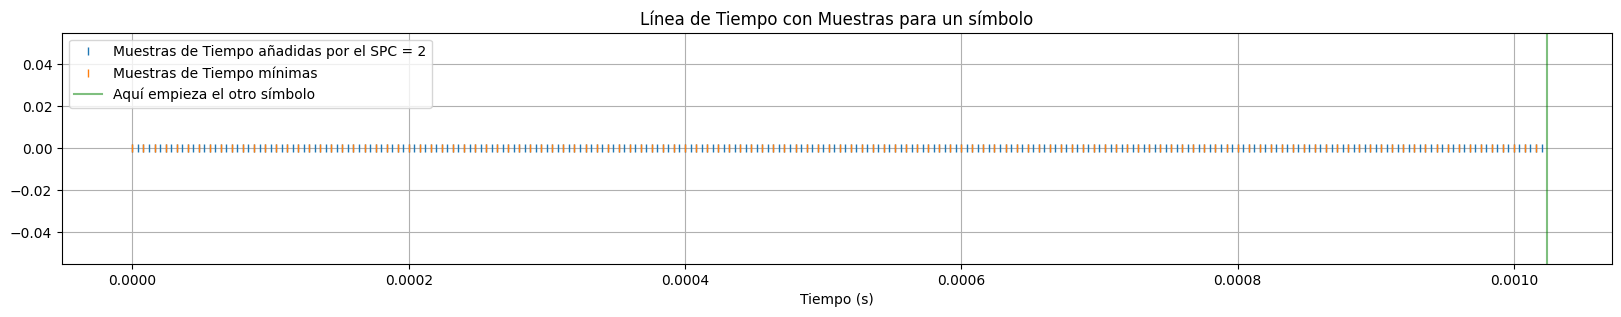

La duración del símbolo es de:  0.001024  segundos. La última muestra de tiempo es:  0.00102  segundos.


In [2]:
# Discretizando las Muestras de Tiempo - Código de Ejemplo
import matplotlib.pyplot as plt
import numpy as np
def generate_time_samples(spreading_factor, bandwidth, samples_per_chip):
    
    # Definimos la duración de símbolo en segundos
    symbol_time = ( 2**spreading_factor ) / bandwidth

    # Definimos la cantidad de muestras por símbolo
    samples_per_symbol = int( ( 2**spreading_factor ) * samples_per_chip )

    # Generamos las muestras de tiempo (serán 129 muestras equiespaciadas, para luego sacar la última, asi logramos el punto 1 y punto 2 en una sola línea de código)
    # También es equivalente si establecemos el parámetro de numpy.linspace "endpoint" a False, pero de esta forma se entiende mejor el concepto.
    # La función numpy.linspace genera un vector de muestras equiespaciadas. Esto es mejor que utilizar np.arange, ya que acumula menos errores de redondeo. (ver: https://numpy.org/doc/stable/reference/generated/numpy.arange.html)
    timeline = np.linspace(0, symbol_time, samples_per_symbol + 1)
    timeline = timeline[0:-1]

    return timeline

# ---------------------------------------------------------------------

spreading_factor, bandwidth, samples_per_chip = 7, 125e3, 2 #  Definimos los parámetros

timeline = generate_time_samples(spreading_factor, bandwidth, samples_per_chip) # Generamos las muestras de tiempo
timeline_spc_1 = generate_time_samples(spreading_factor, bandwidth, 1)

# Plotear la línea de tiempo con puntos en las muestras
plt.figure(figsize=(20, 3))
plt.plot(timeline, np.zeros_like(timeline), '|', label='Muestras de Tiempo añadidas por el SPC = '+str(samples_per_chip))
plt.plot(timeline_spc_1, np.zeros_like(timeline_spc_1), '|', label='Muestras de Tiempo mínimas')
plt.xlabel('Tiempo (s)')
plt.axvline(x=( 2**spreading_factor ) / bandwidth, color='g', linestyle='-', label='Aquí empieza el otro símbolo', alpha = 0.5)
plt.title('Línea de Tiempo con Muestras para un símbolo')
plt.legend()
plt.grid(True)
plt.show()
print("La duración del símbolo es de: ", ( 2**spreading_factor ) / bandwidth, " segundos. La última muestra de tiempo es: ", round(timeline[-1], 6), " segundos.")



#### 3.4.2. Función de Frecuencia Instantánea ( $f(C, t)$ )

Para un símbolo $C$ a transmitir, la frecuencia instantánea $f(C, t)$ en el tiempo $t$ (dentro de la duración del símbolo $0 \le t < T_s$) es:
1.  Frecuencia inicial: $f_{init}(C) = C \cdot \frac{Bw}{2^{SF}}$.
2.  Evolución lineal: $f_{linear}(C, t) = f_{init}(C) + m_f \cdot t = C \cdot \frac{Bw}{2^{SF}} + \frac{Bw^2}{2^{SF}} \cdot t$.
3.  Considerando el envolvimiento cíclico (wrap-around), la frecuencia instantánea se calcula como:

    $f(C, t) = \left( C \cdot \frac{Bw}{2^{SF}} + \frac{Bw^2}{2^{SF}} \cdot t \right) \pmod{Bw}$

Alternativamente, usando la función indicadora $\Chi$ y el tiempo de discontinuidad $\tau_d(C)$:

$f(C, t) = C \cdot \frac{Bw}{2^{SF}} + \frac{Bw^2}{2^{SF}} \cdot t - Bw \cdot \Chi_{\{t \ge \tau_d(C)\}}$

donde $\Chi_{\{condición\}}$ es 1 si la condición es verdadera, y 0 si es falsa. 
> **Nota:** esta formulación con la función indicadora es para un solo "wrap". El operador módulo es más general para múltiples wraps si $T_s$ fuera mucho mayor. De todas formas, en LoRa solo hay un wrap por símbolo como máximo.
>
> Se eligió representar en esta notación a la formula de frecuencia instantánea también ya que se alinea más con el libro de Bixio, tratado en la materia.

Si se considera la transmisión de una secuencia de símbolos, donde $n$ es el índice del símbolo actual ($n=0, 1, 2, \dots$) y el tiempo global es $t_{global}$:

Sea $t_{sym} = t_{global} - n T_s$ el tiempo dentro del símbolo actual.

Entonces:

$f(C_n, t_{sym}, n) = \left( C_n \cdot \frac{Bw}{2^{SF}} + \frac{Bw^2}{2^{SF}} \cdot t_{sym} \right) \pmod{Bw}$.

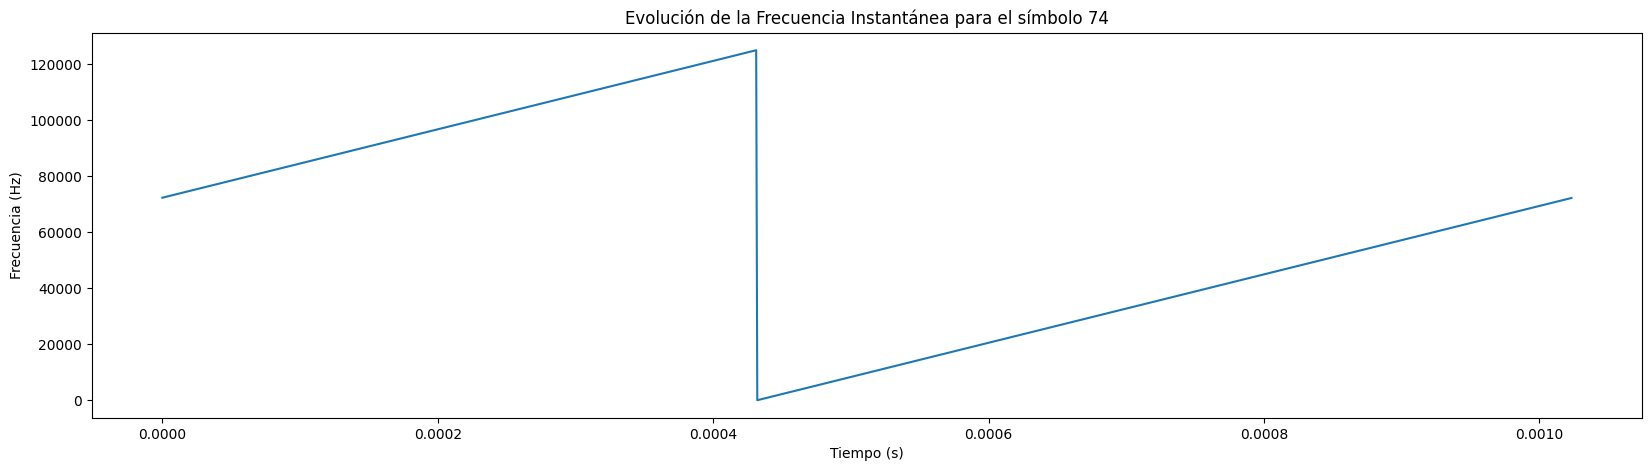

In [16]:
# Frecuencia Instantánea - Código de Ejemplo
def generate_frequency_evolution(timeline, symbol, spreading_factor, bandwidth):
    frequency_slope = bandwidth**2 / ( 2**spreading_factor )
    y_intercept = symbol * (bandwidth/2**spreading_factor)
    frequency_evolution = ( y_intercept + frequency_slope * timeline ) % bandwidth
    return frequency_evolution

# ---------------------------------------------------------------------
spreading_factor, bandwidth, samples_per_chip = 7, 125e3, 10 #  Definimos los parámetros
timeline = generate_time_samples(spreading_factor, bandwidth, samples_per_chip) # Generamos las muestras de tiempo
symbol = np.random.randint(0, 2**spreading_factor) # Definimos el símbolo a analizar
frequency_evolution = generate_frequency_evolution(timeline, symbol, spreading_factor, bandwidth) # Generamos la evolución de la frecuencia
plt.figure(figsize=(20, 5))
plt.plot(timeline, frequency_evolution)
plt.xlabel('Tiempo (s)')
plt.ylabel('Frecuencia (Hz)')
plt.title('Evolución de la Frecuencia Instantánea para el símbolo ' + str(symbol))
plt.show()



#### 3.4.3. Fase Instantánea Acumulada ($\phi(C, t)$)

La señal de RF se genera en forma compleja, $s(t) = A e^{j\phi(t)}$. La fase instantánea $\phi(C, t)$ es $2\pi$ veces la integral de la frecuencia instantánea $f(C, \tau)$ con respecto a $\tau$:

$\phi(C, t) = 2\pi \int_{0}^{t} f(C, \tau) d\tau$

Integrando la expresión lineal (antes del módulo o del salto):

$\displaystyle \int_{0}^{t}f(\tau)d\tau = \int_{0}^{t} (c \cdot \frac{Bw}{2^{SF}} + \frac{Bw}{T_s} \cdot \tau )d\tau$

$\displaystyle \int_{0}^{t}f(\tau)d\tau = \int_{0}^{t} (c \cdot \frac{Bw}{2^{SF}})d\tau + \int_{0}^{t} (\frac{Bw}{T_s} \cdot \tau )d\tau$

$\displaystyle \int_{0}^{t}f(\tau)d\tau = c \cdot \frac{Bw}{2^{SF}}\cdot \tau \bigg|_{0}^{t} + \frac{Bw}{T_s} \cdot \frac{\tau^2}{2} \bigg|_{0}^{t} $

$\displaystyle \int_{0}^{t}f(\tau)d\tau = c \cdot \frac{Bw}{2^{SF}}\cdot t + \frac{Bw}{T_s} \cdot \frac{t^2}{2}  $

$\displaystyle \int_{0}^{t}f(\tau)d\tau = ( c \cdot \frac{Bw}{2^{SF}} + \frac{1}{2} \frac{Bw}{T_s} \cdot t )t  $

Una vez calculada la integral de nuestra función continua, procederemos a analizar gráficamente a la misma para poder determinar como tener en cuenta a la discontinuidad característica de cualquier símbolo. Específicamente, la manera gráfica de transformar nuestra función continua a la limitada en frecuencia, sería:

<center>

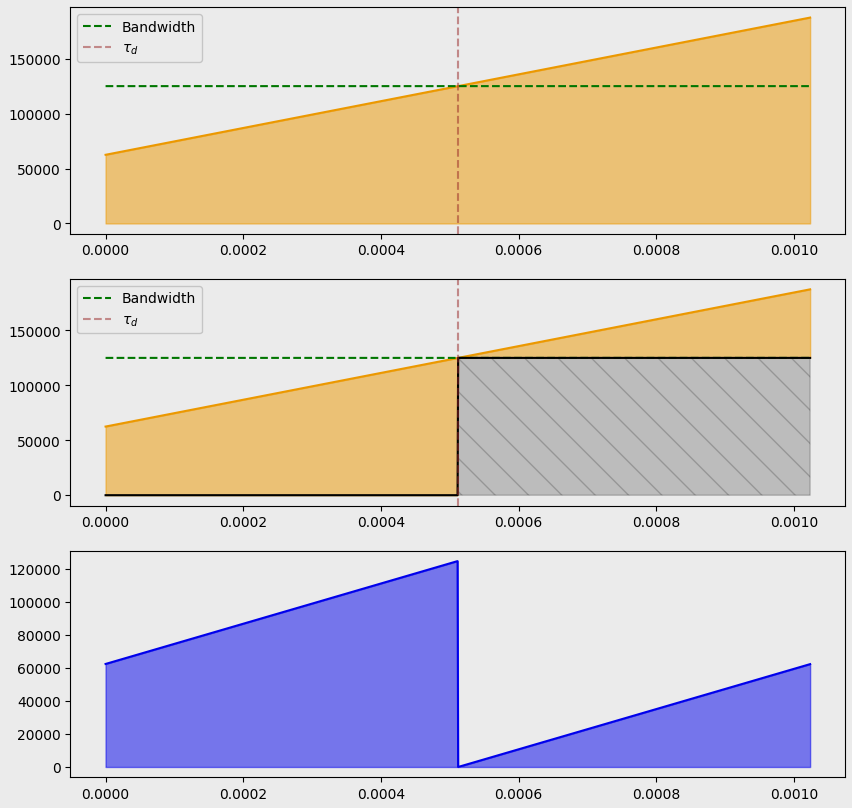

*Figura 3.1. Visualización de Integración con discontinuidades*
</center>

Como se puede observar, cuando el tiempo excede la constante temporal de discontinuidad, a la función libre de discontinuidades se le debe restar el área sobrante dada por la fórmula propia de un rectángulo, cuya base resulta variable y en función del tiempo:

$A(t) = b(t)h = (t - \tau _d)\cdot(Bw)$

Por lo tanto, obtendremos así la función de la frecuencia instantánea, integrada en el tiempo:

$\displaystyle \int_{0}^{t}f(\tau)d\tau = ( c \cdot \frac{Bw}{2^{SF}} + \frac{1}{2} \frac{Bw}{T_s} \cdot t )t  - (t -\tau _d)(Bw)\Chi_{\{ \tau _d(C) \leq t < T_s \}}$

Y de la misma manera, la función de la fase instantánea:

$\phi (t)=2\pi \cdot ( ( c \cdot \frac{Bw}{2^{SF}} + \frac{1}{2} \frac{Bw}{T_s} \cdot t )t  - (t -\tau _d)(Bw)\Chi_{\{ \tau _d(C) \leq t < T_s \}} )$

De esta forma, y añadiendo el coeficiente de magnitud $K$, tendremos:

$K = \frac{1}{\sqrt{2^{SF}SPC}}$

$s(c,t) = K e^{j\phi(c, t)}$

$s(c,t) = \frac{1}{\sqrt{2^{SF}SPC}} e^{j\phi(c, t)}$

$s(c,t) = \frac{1}{\sqrt{2^{SF}SPC}} e^{j 2\pi \cdot ( ( c \cdot \frac{Bw}{2^{SF}} + \frac{1}{2} \frac{Bw}{T_s} \cdot t )t  - (t -\tau _d)(Bw)\Chi_{\{ \tau _d(C) \leq t < T_s \}} )}$

> **Nota:** Se omite la representación matemática para enviar varios símbolos en serie para simplificar. Sin embargo, si se quisiese hacer ese análisis solamente habría que hacer un cambio de variable a $(t -nT_s)$

De esta forma, se obtiene como resultado la función de fase instantánea, dependiente del símbolo $C$ en el tiempo $t$:

$\phi(C, t) = 2\pi \left[ \left( C \cdot \frac{Bw}{2^{SF}} \cdot t + \frac{1}{2} \frac{Bw^2}{2^{SF}} \cdot t^2 \right) - Bw \cdot (t - \tau_d(C)) \cdot \Chi_{\{t \ge \tau_d(C)\}} \right]$

Text(0.5, 1.0, 'Evolución de la Fase de la Señal para el símbolo 87')

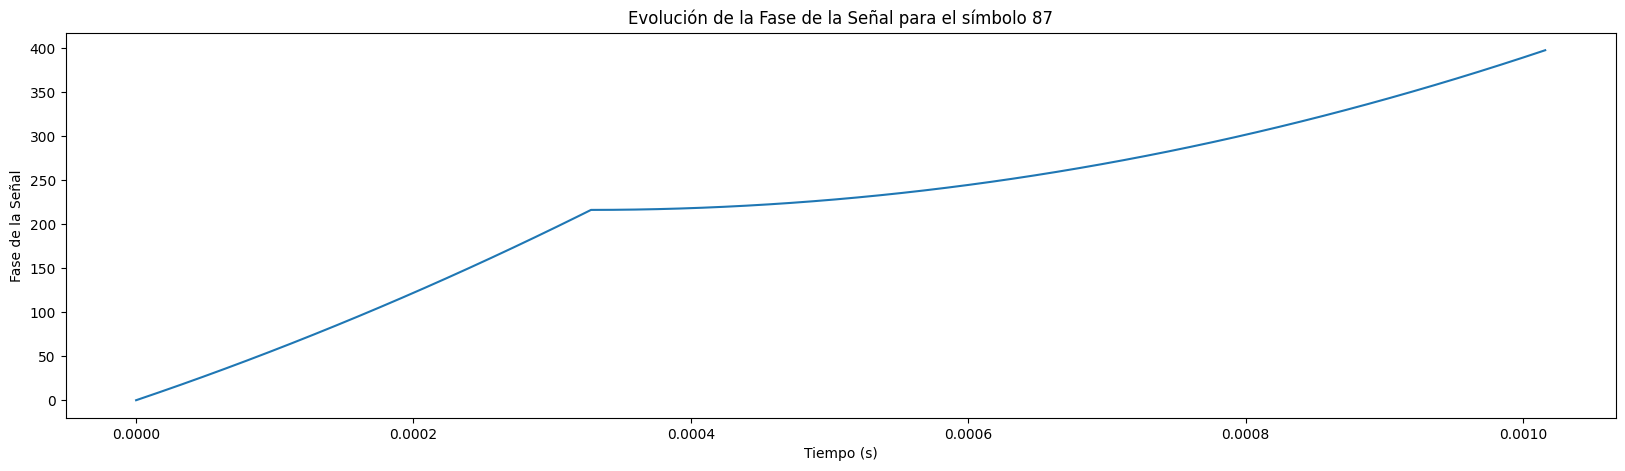

In [6]:
def generate_signal_phase(timeline, symbol, spreading_factor, bandwidth):
    auxiliar_slope = (bandwidth**2/2**(spreading_factor + 1))
    auxiliar_intercept = symbol * (bandwidth/2**spreading_factor)
    discontinuity_time = (2**spreading_factor - symbol) * (1/bandwidth)

    signal_phase = [
        (auxiliar_intercept + auxiliar_slope * t) * t - (t - discontinuity_time) * bandwidth 
        if t >= discontinuity_time 
        else (auxiliar_intercept + auxiliar_slope * t) * t
        for t in timeline
    ]    
    signal_phase = [inst_phase * (2*np.pi) for inst_phase in signal_phase ]
    return signal_phase

# ---------------------------------------------------------------------
spreading_factor, bandwidth, samples_per_chip = 7, 125e3, 1 #  Definimos los parámetros
timeline = generate_time_samples(spreading_factor, bandwidth, samples_per_chip) # Generamos las muestras de tiempo
symbol = np.random.randint(0, 2**spreading_factor) # Definimos el símbolo a analizar
signal_phase1= generate_signal_phase(timeline, symbol, spreading_factor, bandwidth) # Generamos la evolución de la fase de la señal

plt.figure(figsize=(20, 5))
plt.plot(timeline, signal_phase1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Fase de la Señal')
plt.title('Evolución de la Fase de la Señal para el símbolo ' + str(symbol))




#### 3.4.4. Construcción de la Señal Exponencial Compleja ($s(C, t)$)

La señal LoRa en banda base compleja para el símbolo $C$ en el tiempo $t$ es:

$s(C, t) = A \cdot e^{j\phi(C, t)}$

donde $A$ es una constante de amplitud.

Para normalizar la potencia de la señal, a menudo se elige $A = 1/\sqrt{SPS}$ o alguna otra constante relacionada con la energía o potencia deseada. Una elección común para mantener la energía del símbolo constante podría ser $A = 1/\sqrt{T_s}$ si se trabaja en continuo, o $1/\sqrt{SPS}$ para la versión discreta, asumiendo muestras ortogonales.

De esta forma, se utilizará:

$A = 1/\sqrt{2^{SF} \cdot SPC} = 1/\sqrt{SPS}$.

$s(C, t_k) = \frac{1}{\sqrt{SPS}} \exp\left(j 2\pi \left[ \left( C \cdot \frac{Bw}{2^{SF}} \cdot t_k + \frac{1}{2} \frac{Bw^2}{2^{SF}} \cdot t_k^2 \right) - Bw \cdot (t_k - \tau_d(C)) \cdot \Chi_{\{t_k \ge \tau_d(C)\}} \right]\right)$
para cada muestra $k = 0, 1, \dots, SPS-1$.

> **Nota:** La formulación matemática de la modulación se presenta inicialmente en tiempo continuo por claridad pedagógica. La discretización necesaria para la implementación computacional se tratará en secciones posteriores.

Esta señal compleja luego se mezclaría con una portadora de RF para su transmisión, pero el análisis de la modulación y demodulación LoRa se realiza comúnmente en banda base compleja.

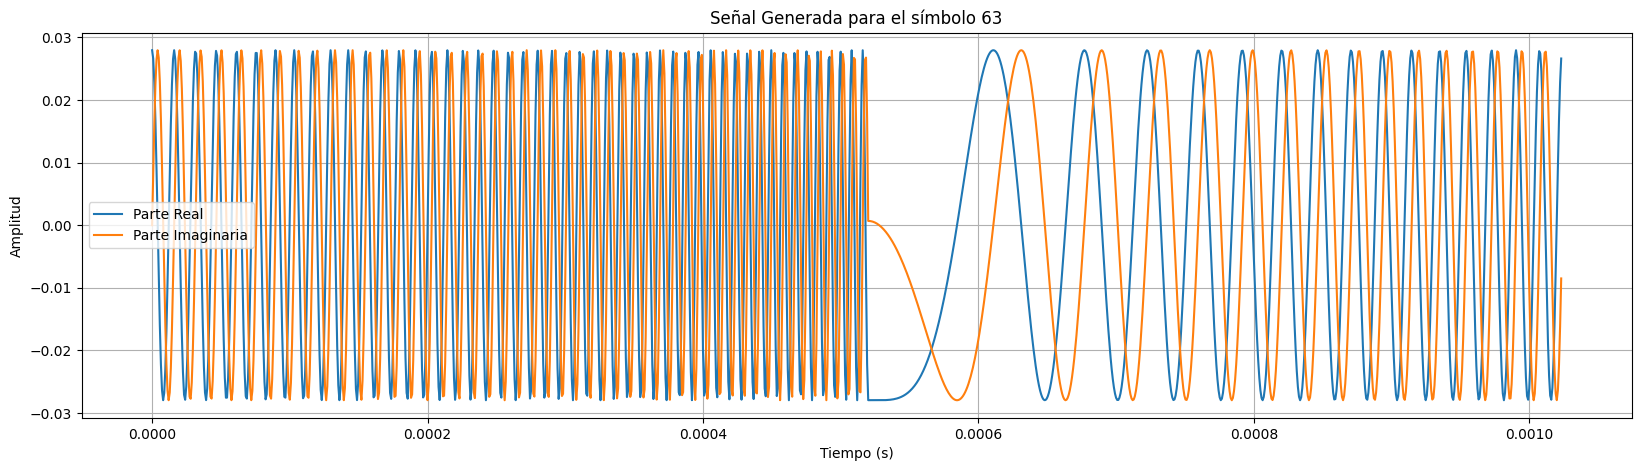

In [18]:
def generate_signal(timeline, symbol, spreading_factor, bandwidth, samples_per_chip):
    signal = np.array([])
    # signal = coeff*e^(j* phase)
    signal_coefficient = 1/np.sqrt(2**spreading_factor * samples_per_chip)
    signal_phase = generate_signal_phase(timeline, symbol, spreading_factor, bandwidth)
    signal = [signal_coefficient * np.exp(1j * instantaneous_phase) for instantaneous_phase in signal_phase]
    
    return signal
# ---------------------------------------------------------------------
spreading_factor, bandwidth, samples_per_chip = 7, 125e3, 10 #  Definimos los parámetros
timeline = generate_time_samples(spreading_factor, bandwidth, samples_per_chip) # Generamos las muestras de tiempo
symbol = 63 # Definimos el símbolo a analizar
signal = generate_signal(timeline, symbol, spreading_factor, bandwidth, samples_per_chip) # Generamos la señal
plt.figure(figsize=(20, 5))
plt.plot(timeline, np.real(signal), label='Parte Real')
plt.plot(timeline, np.imag(signal), label='Parte Imaginaria')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Generada para el símbolo '+str(symbol))
plt.legend()
plt.grid(True)
plt.show()


## 4. Demodulación LoRa: Proceso y Análisis


Una vez que la señal LoRa ha sido transmitida a través del canal y recibida, el receptor debe realizar el proceso de demodulación para recuperar el símbolo de información original. La demodulación en LoRa aprovecha la estructura única de los chirps y se basa fundamentalmente en un proceso de correlación.

### 4.1. Principio de Demodulación Coherente en LoRa

La demodulación LoRa es inherentemente coherente, lo que significa que el receptor necesita generar una réplica local de la señal base para compararla con la señal recibida. El método principal implica multiplicar la señal recibida por un chirp de referencia conjugado (un "down-chirp" base si la señal transmitida fue un "up-chirp") y luego analizar el resultado en el dominio de la frecuencia.

#### 4.1.1. Correlación con un Chirp de Referencia (Downchirp Base)



Si un símbolo LoRa $C$ se transmitió usando un up-chirp cuya frecuencia inicial fue desplazada por $C$, la señal recibida (ignorando el ruido y la atenuación del canal por ahora) será una versión de este up-chirp (con su respectiva discontinuidad en frecuencia si corresponde).

El proceso de "dechirping" consiste en multiplicar esta señal recibida, muestra por muestra en el dominio del tiempo, por un down-chirp base conjugado. Un down-chirp base es aquel que barre linealmente la frecuencia desde $Bw$ hacia $0$ (o desde $f_{max}$ a $f_{min}$ en general) durante la duración del símbolo $T_s$.

El efecto de esta multiplicación es que la **componente de barrido de frecuencia del up-chirp original se cancela con la del down-chirp**, dejando idealmente una señal sinusoidal pura (un tono) en banda base cuya frecuencia es directamente proporcional al símbolo $C$ transmitido. La frecuencia de este tono resultante se puede entonces detectar mediante una Transformada Rápida de Fourier (FFT).

### 4.2. Desarrollo Matemático del Proceso de Demodulación

Para formalizar este proceso, primero debemos considerar la señal recibida y el down-chirp de referencia en el dominio del tiempo discreto.

#### 4.2.1. Discretización de la Señal Recibida: El Cambio de Variable $t \rightarrow k$

Asumimos que la señal recibida $r[k]$ corresponde a las muestras discretas de la señal transmitida $s(C, t_k)$ (ver Sección 3.4.4), posiblemente afectada por ruido y atenuación. Para simplificar el análisis inicial, consideraremos una señal ideal recibida $s[k, C]$ donde $k$ es el índice de la muestra, $k = 0, 1, \dots, SPS-1$.

Recordemos la fase de la señal transmitida:

$\phi(C, k) = 2\pi \left[ \left( C \cdot \frac{Bw}{2^{SF}} \cdot t_k + \frac{1}{2} \frac{Bw^2}{2^{SF}} \cdot t_k^2 \right) - Bw \cdot (t_k - \tau_d(C)) \cdot \Chi_{\{t_k \ge \tau_d(C)\}} \right]$

donde $t_k = k \cdot \frac{1}{Bw \cdot SPC}$.

Sustituyendo $t_k$:

$\phi(C, k) = 2\pi \left[ \left( C \cdot \frac{Bw}{2^{SF}} \cdot \frac{k}{Bw \cdot SPC} + \frac{1}{2} \frac{Bw^2}{2^{SF}} \cdot \left(\frac{k}{Bw \cdot SPC}\right)^2 \right) - Bw \cdot \left(\frac{k}{Bw \cdot SPC} - \tau_d(C)\right) \cdot \Chi_{\{\dots\}} \right]$

$\phi(C, k) = 2\pi \left[ \left( \frac{C \cdot k}{2^{SF} \cdot SPC} + \frac{k^2}{2 \cdot 2^{SF} \cdot SPC^2} \right) - \left(\frac{k}{SPC} - Bw \cdot \tau_d(C)\right) \cdot \Chi_{\{\dots\}} \right]$

Sabiendo que $Bw \cdot \tau_d(C) = Bw \cdot \frac{2^{SF}-C}{Bw} = 2^{SF}-C$:

$\phi(C, k) = 2\pi \left[ \left( \frac{C \cdot k}{N_{SPS}} + \frac{k^2}{2 \cdot N_{SPS} \cdot SPC} \right) - \left(\frac{k}{SPC} - (2^{SF}-C)\right) \cdot \Chi_{\{t_k \ge \tau_d(C)\}} \right]$

donde $N_{SPS} = 2^{SF} \cdot SPC$ es el número total de muestras por símbolo.

La señal transmitida (y recibida idealmente) es $s[k, C] = A \cdot e^{j\phi(C, k)}$.

#### 4.2.2. Generación del Downchirp de Referencia Discreto ($d[k]$)

El down-chirp de referencia $d[k]$ es un chirp que barre linealmente la frecuencia hacia abajo, típicamente desde $f=0$. 

Entonces, se considera un down-chirp que comienza en $f=0$ y tiene una pendiente negativa $m_f = -\frac{Bw^2}{2^{SF}}$.

La frecuencia instantánea del down-chirp base es $f_d(t_k) = -\frac{Bw^2}{2^{SF}} \cdot t_k \pmod{Bw}$.

La fase del down-chirp base $\phi_d(k)$ es:

$\phi_d(k) = 2\pi \int_0^{t_k} \left(-\frac{Bw^2}{2^{SF}} \cdot \tau \right) d\tau = 2\pi \left( -\frac{1}{2} \frac{Bw^2}{2^{SF}} \cdot t_k^2 \right)$

$\phi_d(k) = 2\pi \left( -\frac{1}{2} \frac{Bw^2}{2^{SF}} \cdot \left(\frac{k}{Bw \cdot SPC}\right)^2 \right) = 2\pi \left( -\frac{k^2}{2 \cdot 2^{SF} \cdot SPC^2} \right) = 2\pi \left( -\frac{k^2}{2 \cdot N_{SPS} \cdot SPC} \right)$

Como se puede apreciar, a nivel de sinusoide compleja un cambio de signo en la pendiente implica que la señal sea conjugada a su contraparte original.


#### 4.2.3. Producto de la Señal Recibida y el Downchirp Conjugado (Dechirping)

La señal dechirpeada $s_p[k, C]$ se obtiene multiplicando la señal recibida $s[k, C]$ por el down-chirp de referencia  visto en la sección anterior (que no es más que el upchirp base conjugado) :

$s_p[k, C] = s[k, C] \cdot d^*[k] = (A \cdot e^{j\phi(C, k)}) \cdot (A \cdot e^{j\phi_{ref}(k)})$

$s_p[k, C] = A^2 \cdot e^{j(\phi(C, k) + \phi_{ref}(k))}$

Recordando al downchirp como:

$\phi_{ref}(k) = 2\pi \left( -\frac{k^2}{2 \cdot N_{SPS} \cdot SPC} \right)$

La fase de la señal producto $\phi_p(C, k) = \phi(C, k) + \phi_{ref}(k)$:

$\phi_p(C, k) = 2\pi \left[ \left( \frac{C \cdot k}{N_{SPS}} + \frac{k^2}{2 \cdot N_{SPS} \cdot SPC} \right) - \left(\frac{k}{SPC} - (2^{SF}-C)\right) \cdot \Chi_{\{\dots\}} + \left( -\frac{k^2}{2 \cdot N_{SPS} \cdot SPC} \right) \right]$

$\phi_p(C, k) = 2\pi \left[ \left( \frac{C \cdot k}{N_{SPS}} \right) - \left(\frac{k}{SPC} - (2^{SF}-C)\right) \cdot \Chi_{\{\dots\}} \right]$

Como el término cuadrático se cancela, esta es la formulación correcta que lleva a un tono o armónico, por lo que ya a partir de acá se realizo el *unspreading* que se suele caracterizar en las técnicas de espectro expandido.

La señal dechirpeada es:

$s_p[k, C] = A^2 \cdot \exp\left(j 2\pi \left[ \frac{C \cdot k}{N_{SPS}} - \left(\frac{k}{SPC} - (2^{SF}-C)\right) \cdot \Chi_{\{t_k \ge \tau_d(C)\}} \right]\right)$

In [8]:
def generate_downchirp(sf, bw, timeline, also_return_freq=False, samples_per_chip = 1):
    '''
    This function generates a downchirp signal for a given spreading factor, bandwidth, timeline and samples per chip.
    Parameters:
    sf: spreading factor
    bw: bandwidth
    timeline: discrete timeline
    also_return_freq: boolean to also return the frequency evolution of the downchirp across the timeline
    samples_per_chip: samples per chip
    '''
    # sf: spreading factor
    # freq: frequency
    # timeline: timeline
    y_intercept = 0
    theoretical_symbol_time = (2**sf) / bw
    freqs = []
    slope = - bw / theoretical_symbol_time
    coeff = 1/(np.sqrt(2**sf * samples_per_chip) )
    signal = []

    for i in range(len(timeline)):
        freq = y_intercept + slope * timeline[i]
        integrated_freq = y_intercept + 0.5 * slope * timeline[i] * timeline[i]
        inst_phase = 2 * np.pi * (integrated_freq) 
        signal.append( coeff * np.exp(1j * inst_phase))
        freqs.append(freq)
        

    if also_return_freq:
        return signal, freqs
    return signal


def multiply(signal, sf, downchirp):

    product = []
    for i in range(len(signal)):
        product.append(signal[i] * downchirp[i])

    return product

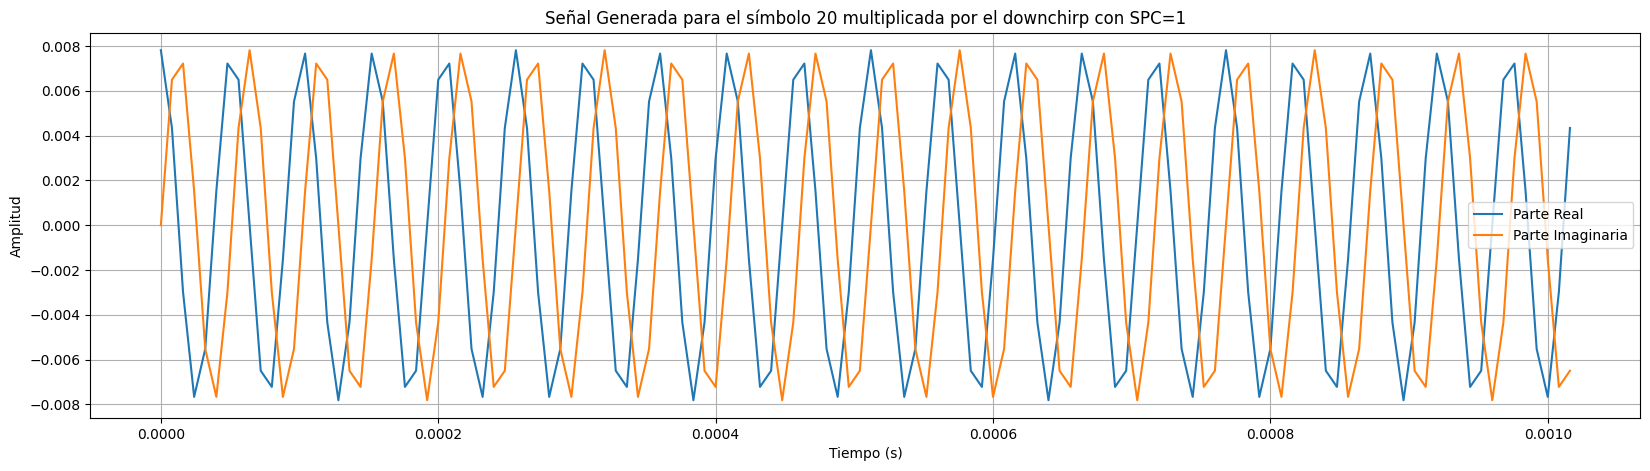

In [20]:
spreading_factor, bandwidth, samples_per_chip = 7, 125e3, 1 #  Definimos los parámetros
timeline = generate_time_samples(spreading_factor, bandwidth, samples_per_chip) # Generamos las muestras de tiempo
symbol = 20 # Definimos el símbolo a analizar
signal = generate_signal(timeline, symbol, spreading_factor, bandwidth, samples_per_chip) # Generamos la señal
downchirp = generate_downchirp(spreading_factor, bandwidth, timeline) # Generamos el downchirp
product = multiply(signal, spreading_factor, downchirp) # Multiplicamos la señal por el downchirp
plt.figure(figsize=(20, 5))
plt.plot(timeline, np.real(product), label='Parte Real')
plt.plot(timeline, np.imag(product), label='Parte Imaginaria')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal Generada para el símbolo '+str(symbol)+' multiplicada por el downchirp con ' + ('SPC>1' if samples_per_chip > 1 else 'SPC=1'))
plt.legend()
plt.grid(True)
plt.show()

#### 4.2.4. Análisis de la Señal Producto $s_p[k,C]$

**Caso Ideal: `SPC=1` y la Generación de un Tono Puro Discreto**

Si `SPC = 1`, entonces $N_{SPS} = 2^{SF}$. El término dentro del paréntesis de la función indicadora se vuelve:
$\left(k - (2^{SF}-C)\right)$.
Dado que $k$, $2^{SF}$ y $C$ son enteros, este término es un entero.
La fase del segundo término, cuando la condición de la función indicadora es verdadera, es $2\pi \cdot (\text{entero})$. Esto significa que $e^{j 2\pi \cdot (\text{entero})} = 1$.
Por lo tanto, para `SPC = 1`, el segundo término no afecta la fase de manera observable y la señal dechirpeada se simplifica a:
$s_p[k, C] \approx A^2 \cdot e^{j 2\pi \frac{C \cdot k}{2^{SF}}}$
Esta es la ecuación de un tono complejo discreto con $2^{SF}$ muestras, cuya frecuencia normalizada es $f_{norm} = C / 2^{SF}$. La "frecuencia" en términos de índices de la DFT será directamente $C$.

**Impacto de Sobremuestreo `SPC>1` y la Aparición de Tonos Múltiples**

Si `SPC > 1`, el término $\frac{k}{SPC}$ ya no es necesariamente un entero, ni lo es $\left(\frac{k}{SPC} - (2^{SF}-C)\right)$.
La señal dechirpeada $s_p[k, C]$ ahora es una combinación de dos segmentos de fase lineal con pendientes diferentes:
*   Cuando $t_k < \tau_d(C)$ (es decir, $\Chi = 0$): La fase evoluciona como $2\pi \frac{C \cdot k}{N_{SPS}}$.
*   Cuando $t_k \ge \tau_d(C)$ (es decir, $\Chi = 1$): La fase evoluciona como

     $2\pi \left[ \frac{C \cdot k}{N_{SPS}} - \left(\frac{k}{SPC} - (2^{SF}-C)\right) \right]$.

    El segundo término puede reescribirse como $2\pi \left[ \frac{C \cdot k}{N_{SPS}} - \frac{k}{SPC} + (2^{SF}-C) \right]$.

    $2\pi \left[ k \left( \frac{C}{2^{SF}SPC} - \frac{1}{SPC} \right) + (2^{SF}-C) \right] = 2\pi \left[ k \frac{C - 2^{SF}}{2^{SF}SPC} + (2^{SF}-C) \right]$.

    La frecuencia instantánea normalizada en este segmento cambia.

En la FFT de esta señal dechirpeada con `SPC > 1`, el pico principal aún se espera en el índice correspondiente al símbolo $C$, pero pueden aparecer otros picos significativos junto con un ensanchamiento del pico principal debido a la discontinuidad de fase o frecuencia en $t_k = \tau_d(C)$ y la diferente pendiente de fase en los dos segmentos. Específicamente, se observa que la energía se distribuye también en frecuencias que son múltiplos de $2^{SF}$ desplazadas por $C$.

### 4.3. Estimación del Símbolo Transmitido

El paso final es aplicar la Transformada Discreta de Fourier (DFT), comúnmente implementada como la FFT, a la señal dechirpeada $s_p[k, C]$ y encontrar el índice de frecuencia donde ocurre el pico de máxima energía.

#### 4.3.1. Aplicación de la Transformada Discreta de Fourier (DFT) a $s_p[k,C]$

La DFT de $N_{SPS}$ puntos de $s_p[k, C]$ es:

$X[q] = \sum_{k=0}^{N_{SPS}-1} s_p[k, C] \cdot e^{-j 2\pi \frac{k \cdot q}{N_{SPS}}}$, para $q = 0, 1, \dots, N_{SPS}-1$.

Si `SPC = 1`, entonces $N_{SPS} = 2^{SF}$.
Denotaremos $N = 2^{SF}$ para simplificar la notación.

$s_p[k, C] = A^2 \cdot e^{j 2\pi \frac{C \cdot k}{N}}$.

$\displaystyle X[q] = A^2 \sum_{k=0}^{N-1} e^{j 2\pi \frac{C \cdot k}{N}} \cdot e^{-j 2\pi \frac{k \cdot q}{N}} = A^2 \sum_{k=0}^{N-1} e^{j 2\pi k \frac{C-q}{N}}$

Para efectos del resultado, se analizarán ambos casos. Cuando $q=C$ y cuando $q\neq C$.

##### **Caso 1: $q = C$**

Si $q=C$, el exponente de la exponencial en la sumatoria se convierte en:

$j 2\pi k \frac{C-C}{N} = j 2\pi k \frac{0}{N} = 0$.

Por lo tanto, $e^{0} = 1$.

La sumatoria se transforma en:

$\sum_{k=0}^{N-1} e^{0} = \sum_{k=0}^{N-1} 1$

Esta suma consiste en $N$ términos, cada uno igual a 1.

$\sum_{k=0}^{N-1} 1 = N \cdot 1 = N$.

Entonces, para $q=C$:

$X[C] = A^2 \cdot N$.

>**NOTA:**
>Se puede observar entonces que cuando $q=C$, el componente de la DFT es
>
>$X[C] = A^2 \cdot N = A^2 \cdot 2^{SF}$.
>
>Si $A = 1/\sqrt{2^{SF}}$, entonces $A^2 = 1/2^{SF}$.
>
>Así,
> 
>$X[C] = (1/2^{SF}) \cdot 2^{SF} = 1$.


##### **Caso 2: $q \neq C$**

La sumatoria es una serie geométrica de la forma $\sum_{k=0}^{N-1} r^k$, donde la razón $r = e^{j 2\pi \frac{C-q}{N}}$.

Dado que $q \neq C$ y tanto $q$ como $C$ están en el rango $[0, N-1]$, $(C-q)$ no es un múltiplo de $N$ (excepto si $C-q=0$, que es el Caso 1). Por lo tanto, $r \neq 1$.

La suma de una serie geométrica finita es $S = \frac{1 - r^N}{1 - r}$. (Como se puede apreciar, este caso si se puede resolver mediante serie geométrica ya que la razón no toma el vlaor de 1 y por lo tanto no anula al denominador)

Consideremos el término $r^N$:

$r^N = \left(e^{j 2\pi \frac{C-q}{N}}\right)^N = e^{j 2\pi \frac{C-q}{N} \cdot N} = e^{j 2\pi (C-q)}$.

Como $C$ y $q$ son enteros, $(C-q)$ es un entero. Por lo tanto, $e^{j 2\pi (\text{entero})} = 1$.

Sustituyendo $r^N = 1$ en la fórmula de la suma:

$S = \frac{1 - 1}{1 - r} = \frac{0}{1 - r}$.

Dado que $r \neq 1$, el denominador $1-r \neq 0$.

Por lo tanto, $S = 0$.

Entonces, para $q \neq C$:

$X[q] = A^2 \cdot 0 = 0$.

Así, se observa un pico claro con valor 1 en el índice de frecuencia $q=C$ (en un canal ideal), mientras que para $q \neq C$, el valor es 0.

Esto permite la identificación unívoca del símbolo $C$ mediante la búsqueda del máximo en la salida de la DFT, constituyendo un proceso de decisión de máxima verosimilitud (ML) para este caso idealizado.

>**Conclusión:**
>
>Entonces, el símbolo estimado $\hat{C}$ es el índice $q$ para el cual la magnitud (o magnitud al cuadrado) de $X[q]$ es máxima:
>
>$\hat{C} = \text{argmax}_{q} X[q]$ (considerando $q$ en el rango de $0$ a $2^{SF}-1$).

#### 4.3.2. Estrategias para SPC > 1
Cuando `SPC > 1`, la longitud de la FFT es $N_{SPS} = 2^{SF} \cdot SPC$. El pico principal correspondiente al símbolo $C$ todavía estará presente, pero también pueden aparecer otros picos significativos en $C + m \cdot 2^{SF}$ (donde $m$ es un entero) debido al "aliasing" o a la estructura de la señal dechirpeada. A continuación se presentan soluciones para abordar esta problemática.

**Diezmado en el Dominio Temporal (Submuestreo Estratégico)**

Una opción sería submuestrear la señal dechirpeada $s_p[k,C]$ tomando solo una muestra cada `SPC` muestras antes de la FFT. Esto reduciría la longitud de la FFT a $2^{SF}$ puntos y se asemejaría al caso `SPC = 1`. Sin embargo, esto descarta las ventajas operativas que implica usar un `SPC>1`.

**Combinación de Componentes en el Dominio de la Frecuencia (Suma de Alias Controlada o Decimación)**

Una estrategia más efectiva es realizar la FFT de $N_{SPS}$ puntos y luego combinar la energía de los "bins" (índices de frecuencia) que corresponden al mismo símbolo base.

Si se espera que la energía del símbolo $C$ se manifieste en los bins $C, C+2^{SF}, C+2 \cdot 2^{SF}, \dots, C+(SPC-1) \cdot 2^{SF}$, se puede sumar la magnitud (o también la magnitud al cuadrado) de estos bins.

> **NOTA:** La magnitud al cuadrado sería
> 
> $P_{eff}[c] = \sum_{m=0}^{SPC-1} |X[c + m \cdot 2^{SF}]|^2$, para $c = 0, 1, \dots, 2^{SF}-1$.

El símbolo estimado sería entonces:

$\hat{C} = \text{argmax}_{q} X[q]$

Esto efectivamente "pliega" el espectro de la FFT de $N_{SPS}$ puntos en un espectro de $2^{SF}$ puntos, consolidando la energía del símbolo. Esta es la técnica utilizada en el código de ejemplo del notebook para `SPC > 1`.

simbolo enviado  10


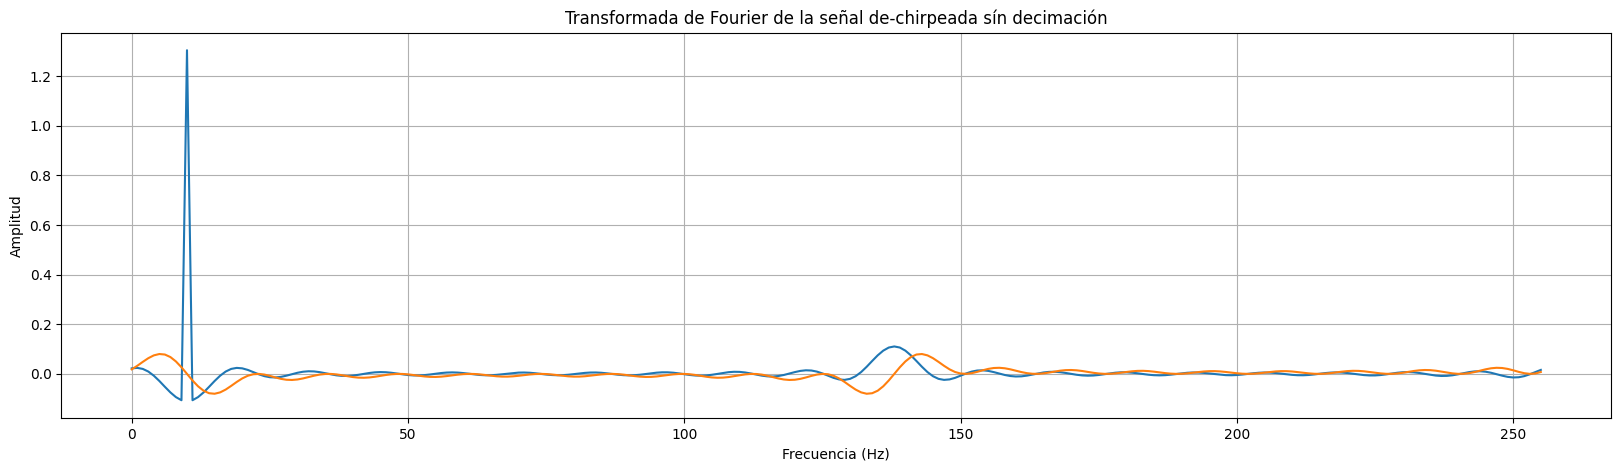

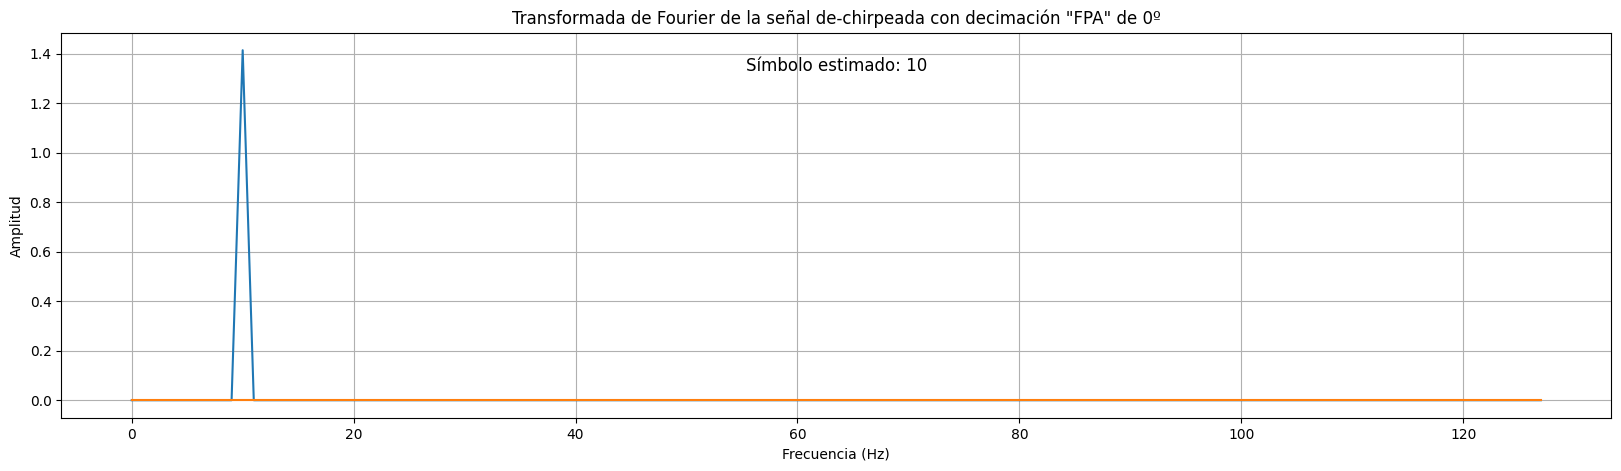

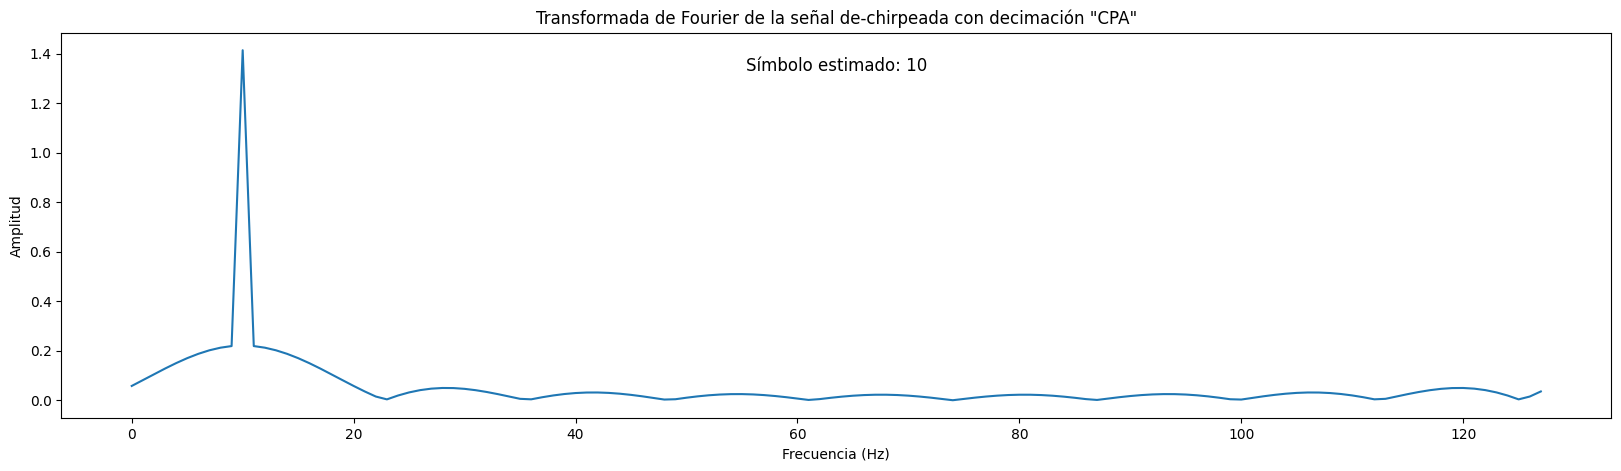

In [13]:
def correlate(signal, sf, downchirp, return_symbol_instead=False):
    '''
    This function correlates a signal with a downchirp signal, resulting in the demodulation of the message.
    Parameters:
    signal: complex signal (array)
    sf: spreading factor
    downchirp: downchirp signal (array)
    return_symbol_instead: boolean to return the symbol instead of the fourier transform
    '''
    product = []
    for i in range(len(signal)):
        product.append(signal[i] * downchirp[i])

    fourier_transform = np.fft.fft(product)
    
    if return_symbol_instead:
        return np.argmax(fourier_transform)  
    return fourier_transform

spreading_factor, bandwidth, samples_per_chip = 7, 125e3, 2 #  Definimos los parámetros
symbol = np.random.randint(0,2**spreading_factor) # Definimos el símbolo a analizar
symbol = 10
timeline = generate_time_samples(spreading_factor, bandwidth, samples_per_chip) # Generamos las muestras de tiempo
signal = generate_signal(timeline, symbol, spreading_factor, bandwidth, samples_per_chip) # Generamos la señal
downchirp = generate_downchirp(spreading_factor, bandwidth, timeline) # Generamos el downchirp

fourier_transform = correlate(signal, spreading_factor, downchirp) # Correlacionamos la señal con el downchirp

# Combinamos linealmente la transformada de fourier cada 2**spreading_factor muestras


plt.figure(figsize=(20, 5))
plt.plot(np.real(fourier_transform))
plt.plot(np.imag(fourier_transform))
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.title('Transformada de Fourier de la señal de-chirpeada sín decimación')
plt.grid(True)
print("simbolo enviado ", symbol)

if samples_per_chip > 1:
    fft_ideal_length = 2**spreading_factor
    custom_decimated_fourier_transform = [fourier_transform[i]+ fourier_transform[i + (samples_per_chip-1)*2**spreading_factor] for i in range(fft_ideal_length)]

    plt.figure(figsize=(20, 5))
    plt.plot(np.real(custom_decimated_fourier_transform))
    plt.plot(np.imag(custom_decimated_fourier_transform))
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title('Transformada de Fourier de la señal de-chirpeada con decimación \"FPA\" de 0º')
    plt.grid(True)
    plt.text(0.5, 0.9, f'Símbolo estimado: {np.abs(np.argmax(custom_decimated_fourier_transform))}', horizontalalignment='center', fontsize=12, transform=plt.gca().transAxes)

    plt.figure(figsize=(20, 5))
    custom_decimated_fourier_transform = [np.abs(fourier_transform[i])+ np.abs(fourier_transform[i + (samples_per_chip-1)*2**spreading_factor]) for i in range(fft_ideal_length)]
    plt.plot(custom_decimated_fourier_transform)
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud')
    plt.title('Transformada de Fourier de la señal de-chirpeada con decimación \"CPA\"')
    plt.text(0.5, 0.9, f'Símbolo estimado: {np.abs(np.argmax(custom_decimated_fourier_transform))}', horizontalalignment='center', fontsize=12, transform=plt.gca().transAxes)
    
plt.show()



#### 4.3.3. Criterio de Decisión de Máxima Verosimilitud (ML) Simplificado
El proceso de encontrar el bin de la FFT con la máxima energía es una forma simplificada de un detector de máxima verosimilitud en un canal AWGN (Ruido Blanco Aditivo Gaussiano) cuando todos los símbolos son igualmente probables y tienen la misma energía. Al correlacionar y luego integrar (multiplicar por el down-chirp conjugado para luego realizar la FFT que es una forma de integración), se busca la señal de referencia (el tono correspondiente al símbolo) que mejor coincide con la señal recibida procesada.

> **Nota Metodológica:** El análisis anterior asume una sincronización perfecta de tiempo y frecuencia. En sistemas reales, la sincronización es un paso crítico y complejo que precede a la demodulación de datos descrita, usualmente involucrando la detección del preámbulo de la trama LoRa e implementando técnicas distintas a la de Decimación en frecuencia típica para salvar los problemas de las RF reales y los componentes de Hardware.